## Import Libraries:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Import Clean Table:

In [9]:
df = pd.read_csv("../data/clean/final_df.csv")

In [10]:
# Ensure date_time is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = pd.to_datetime(df['year'])
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

# Confirm data types
print(df.dtypes)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1757940005.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
Variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
year                datetime64[ns]
date                datetime64[ns]
time                datetime64[ns]
dtype: object


---

# Find Ideal Customer Analysis

### Analysis by Gender and Age Group

In [16]:
# Create age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

In [18]:
# Analyse gender distribution
gender_distribution = df['gendr'].value_counts(normalize=True) * 100
print("Gender Distribution (in %):")
print(gender_distribution)

Gender Distribution (in %):
gendr
M    33.772659
U    33.712842
F    32.511385
X     0.003113
Name: proportion, dtype: float64


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3116363945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gendr', palette='Set2')


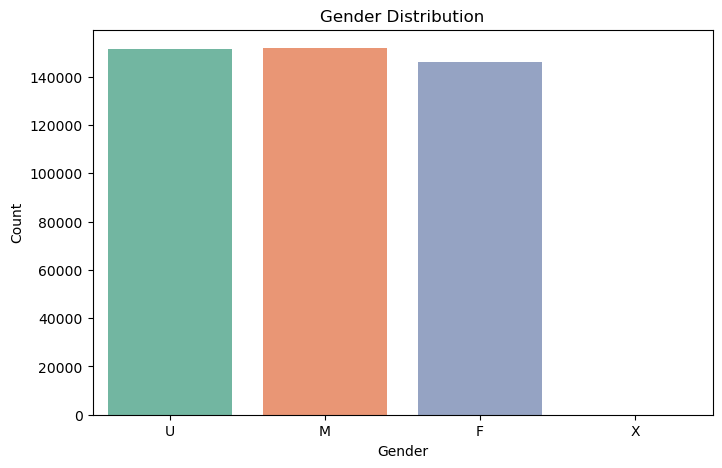

In [20]:
# Visualize Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gendr', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [22]:
# Analyze gender distribution by age group
gender_age_group_distribution = df.groupby(['age_group', 'gendr']).size().unstack().fillna(0)
display(gender_age_group_distribution)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3062669811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group_distribution = df.groupby(['age_group', 'gendr']).size().unstack().fillna(0)


gendr,F,M,U,X
age_group,,,,
<20,1196,1313,5021,0
20-30,13615,17218,40454,3
30-40,22850,25591,27609,0
40-50,26166,27285,22593,5
50-60,38192,36392,29300,6
60-70,32006,30948,20837,0
70+,12180,13130,5794,0


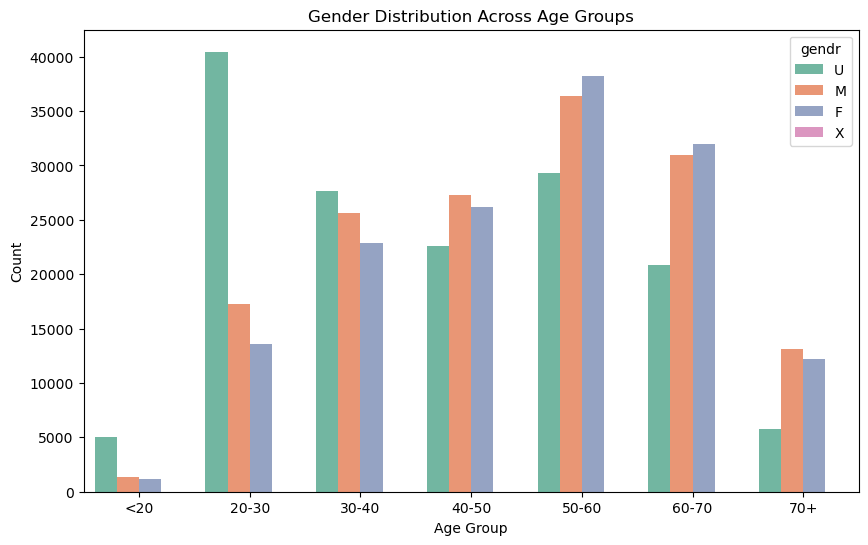

In [24]:
# Visualize Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='gendr', palette='Set2')
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Analysis of Client's Tenure by age and gender:

In [27]:
# Grouping by gender and age group to analyze tenure
tenure_analysis = df.groupby(['gendr', 'age_group'])['clnt_tenure_mnth'].agg(['mean', 'median', 'max']).reset_index()

# Sorting to see which gender and age group has the longest average tenure
sorted_tenure = tenure_analysis.sort_values(by='max', ascending=False)

# Displaying the results
print("Tenure Analysis by Gender and Age Group:")
display(tenure_analysis)

print("\nSorted by Maximum Tenure:")
display(sorted_tenure)

Tenure Analysis by Gender and Age Group:


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/956464289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_analysis = df.groupby(['gendr', 'age_group'])['clnt_tenure_mnth'].agg(['mean', 'median', 'max']).reset_index()


,gendr,age_group,mean,median,max
0,F,<20,192.526756,209.0,325.0
1,F,20-30,155.033639,140.0,449.0
2,F,30-40,159.903895,157.0,655.0
3,F,40-50,181.527861,178.0,668.0
4,F,50-60,189.746308,178.0,749.0
5,F,60-70,200.201743,185.0,667.0
6,F,70+,224.147126,203.0,668.0
7,M,<20,193.099010,197.0,532.0
8,M,20-30,155.312406,140.0,516.0
9,M,30-40,160.417412,156.0,596.0



Sorted by Maximum Tenure:


,gendr,age_group,mean,median,max
4,F,50-60,189.746308,178.0,749.0
10,M,40-50,182.018398,179.0,669.0
20,U,70+,107.736279,84.0,669.0
3,F,40-50,181.527861,178.0,668.0
6,F,70+,224.147126,203.0,668.0
5,F,60-70,200.201743,185.0,667.0
2,F,30-40,159.903895,157.0,655.0
12,M,60-70,200.477995,189.0,610.0
11,M,50-60,195.178885,188.0,610.0
13,M,70+,232.459482,225.0,602.0


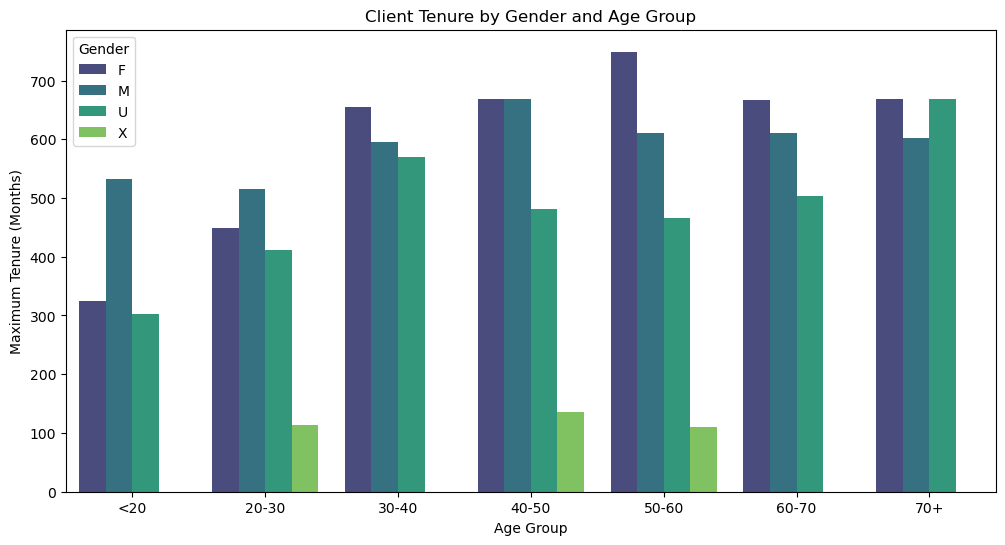

In [29]:
# Bar plot for maximum tenure by gender and age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='max', hue='gendr', data=sorted_tenure, palette='viridis')
plt.title('Client Tenure by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Maximum Tenure (Months)')
plt.legend(title='Gender')
plt.show()

### Recap of the Method Used:
1. Age Grouping: Clients were categorized into specific age groups using bins, ranging from <20 to 70+, to segment the data for further analysis.
2. Gender Distribution Analysis: Gender distribution across the dataset was calculated as percentages. Then, gender distribution was analyzed across different age groups to uncover any trends or imbalances.
3. Tenure Analysis: The dataset was grouped by gender and age to calculate the mean, median, and maximum client tenure (in months). This was done to understand which groups had the longest customer tenure.

### Visualisation:
1. Gender Distribution: A count plot shows the breakdown of clients by gender.
2. Gender Distribution Across Age Groups: A count plot that highlights how gender is distributed across different age groups.
3. Client Tenure by Gender and Age Group: A bar plot visualizing the maximum tenure for each age group, split by gender.

### Result from Customer Metrics:
- The distribution shows a relatively balanced gender split among users, with males (M) representing around 33.8%, females (F) around 32.5%, and users with undefined or unclassified genders (U) also making up 33.7%.
- Primary clients do not skew heavily toward any specific gender.
- The largest proportion of clients falls in the 50-60 and 60-70 age groups, indicating that the majority of users are older.
- There is also a significant number of users in the 30-40 and 40-50 age groups.
- The youngest age group (<20) has the fewest users.
- The results indicate that the oldest clients (70+) have the longest average tenure, followed by the 60-70 and 50-60 age groups.
- Female clients in the 50-60 age group have the longest maximum tenure (749 months), suggesting that older clients tend to stay with the service longer.
- In males, the 40-50 and 70+ groups show high maximum tenure values (669 and 602 months, respectively).
- Females in the 70+ age group also show a significantly high mean and maximum tenure, indicating strong retention in older clients.

### Conclusion from Customer Metrics:
- Focus future Analysis on 2 Age Groups 30-50 and 50-70
- Best Clients are Female in the 50-60 Age Group

---

# Completion Rate Analysis

### Time Spent per Step

In [36]:
# Filter the data for age groups 30-50 and 50-70
df_filtered = df[(df['clnt_age'] >= 30) & (df['clnt_age'] <= 70)]
df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)

# Sort the data by client_id, visit_id, and date_time for proper time analysis
df_sorted = df_filtered.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop rows where time_diff is NaN
df_sorted = df_sorted.dropna(subset=['time_diff'])

# Display the filtered data to verify the changes
df_sorted

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/2632141121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group,time_diff
381111,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:19:45,30-50,9.0
381110,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:20:31,30-50,46.0
381109,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:22:05,30-50,94.0
381108,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:23:09,30-50,64.0
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0


In [38]:
# Group by age group, variation (Test/Control), and process step to calculate average time spent
avg_time_by_group_age = df_sorted.groupby(['age_group', 'Variation', 'process_step'])['time_diff'].mean().reset_index()
display(avg_time_by_group_age)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3771357340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_group_age = df_sorted.groupby(['age_group', 'Variation', 'process_step'])['time_diff'].mean().reset_index()


,age_group,Variation,process_step,time_diff
0,30-50,Control,confirm,109.840705
1,30-50,Control,start,143.715692
2,30-50,Control,step_1,36.525214
3,30-50,Control,step_2,31.689091
4,30-50,Control,step_3,99.162427
5,30-50,Test,confirm,101.573098
6,30-50,Test,start,141.717002
7,30-50,Test,step_1,32.530996
8,30-50,Test,step_2,38.872408
9,30-50,Test,step_3,102.025082


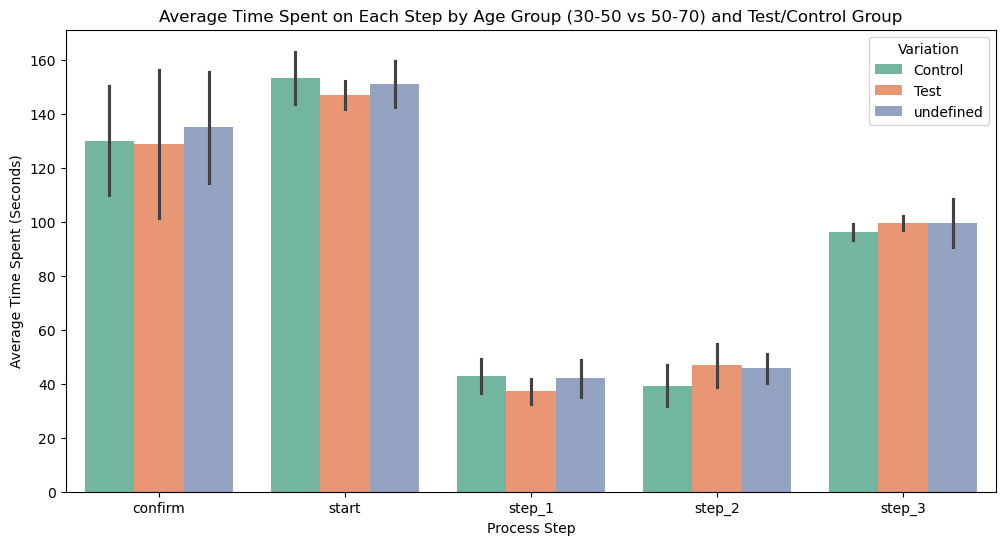

In [40]:
# Visualize the time spent on each step by age group and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='time_diff', hue='Variation', data=avg_time_by_group_age, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 vs 50-70) and Test/Control Group')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Variation')
plt.show()

In [42]:
# Identify users who reached the 'confirm' step
df_sorted['completed'] = df_sorted['process_step'] == 'confirm'

# Calculate the completion rate by variation and age group
completion_rate = df_sorted.groupby(['Variation', 'age_group'])['completed'].mean().reset_index()
display(completion_rate)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1483812649.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_rate = df_sorted.groupby(['Variation', 'age_group'])['completed'].mean().reset_index()


,Variation,age_group,completed
0,Control,30-50,0.157369
1,Control,50-70,0.148531
2,Test,30-50,0.172759
3,Test,50-70,0.146320
4,undefined,30-50,0.165239
5,undefined,50-70,0.144391


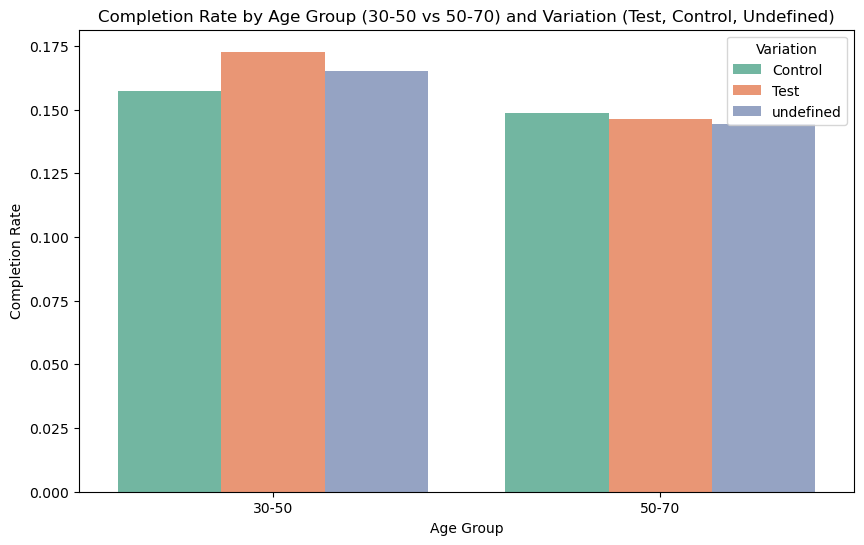

In [44]:
# Visualize the completion rate by variation and age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completed', hue='Variation', data=completion_rate, palette='Set2')
plt.title('Completion Rate by Age Group (30-50 vs 50-70) and Variation (Test, Control, Undefined)')
plt.ylabel('Completion Rate')
plt.xlabel('Age Group')
plt.legend(title='Variation')
plt.show()

### Recap of Method Used:
1.	Data Preparation:
- The dataset was filtered to include only clients aged between 30 and 70 years old, and they were categorized into two age groups: 30-50 and 50-70.
- The data was then sorted by client_id, visit_id, and date_time to ensure that the time spent on each step could be calculated accurately.
2.	Time Spent per Step:
- The time difference (time_diff) between each step was calculated for each client based on the date_time column.
- The data was grouped by age group (30-50, 50-70), variation (Test/Control), and process step to calculate the average time spent on each step.
3.	Completion Rate Calculation:
- A new column completed was created to flag clients who reached the final step (confirm).
- The completion rate was then calculated by age group and variation (Test/Control).

### Results:
1. Average Time Spent per Step:
- In the 30-50 age group:
	- The Control group spends more time on start (143.71 seconds) and step_3 (99.16 seconds).
	- The Test group spends less time on start (141.72 seconds) but more on step_2 (38.87 seconds) compared to the Control group.
- In the 50-70 age group:
	- The Control group spends more time on start (162.98 seconds) and confirm (150.15 seconds).
	- The Test group spends slightly less time on start (152.30 seconds) but more time on step_2 (54.78 seconds).
2. Completion Rate:
	- In the 30-50 age group, the completion rate was higher in the Test group (17.28%) than the Control group (15.74%).
	- In the 50-70 age group, the completion rate was slightly higher in the Control group (14.85%) compared to the Test group (14.63%).

### Conclusion:
- Time Efficiency: While the new design (Test group) performs slightly better in terms of time spent on the start step for both age groups, it seems to take longer in the middle steps, particularly in the 50-70 age group.
- Completion Rates: The completion rate for the Test group in the 30-50 age group is higher than in the Control group, suggesting a potential improvement in user flow for younger clients. However, the older age group (50-70) performs better in the Control group, indicating that the new design may not be as effective for older users.


### Time Spent per step with comparison by Age Group

In [47]:
# Define the age bins
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Create a new column for age group
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Filter the data for age groups 30-50 and 50-70
filtered_df = df[df['age_group'].isin(['30-50', '50-70'])]
display(filtered_df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:51:13,50-70
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:47:50,50-70
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:46:45,50-70
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:23:08,50-70
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:22:24,50-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:48:02,50-70
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:44:07,50-70
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:43:10,50-70
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:41:32,50-70


In [49]:
# Ensure the date_time column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the data by client_id, visit_id, and date_time
df_sorted = filtered_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps (in seconds)
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop the first occurrence where time_diff is NaN
df_sorted.dropna(subset=['time_diff'], inplace=True)

In [51]:
display(df_sorted)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group,time_diff
381111,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:19:45,30-50,9.0
381110,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:20:31,30-50,46.0
381109,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:22:05,30-50,94.0
381108,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:23:09,30-50,64.0
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0


In [53]:
# Set the correct order for process_step
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_sorted['process_step'] = pd.Categorical(df_sorted['process_step'], categories=step_order, ordered=True)

In [55]:
# Group by gender, age group, and process step to calculate mean time spent
avg_time_by_group = df_sorted.groupby(['gendr', 'age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/208393966.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_group = df_sorted.groupby(['gendr', 'age_group', 'process_step'])['time_diff'].mean().reset_index()


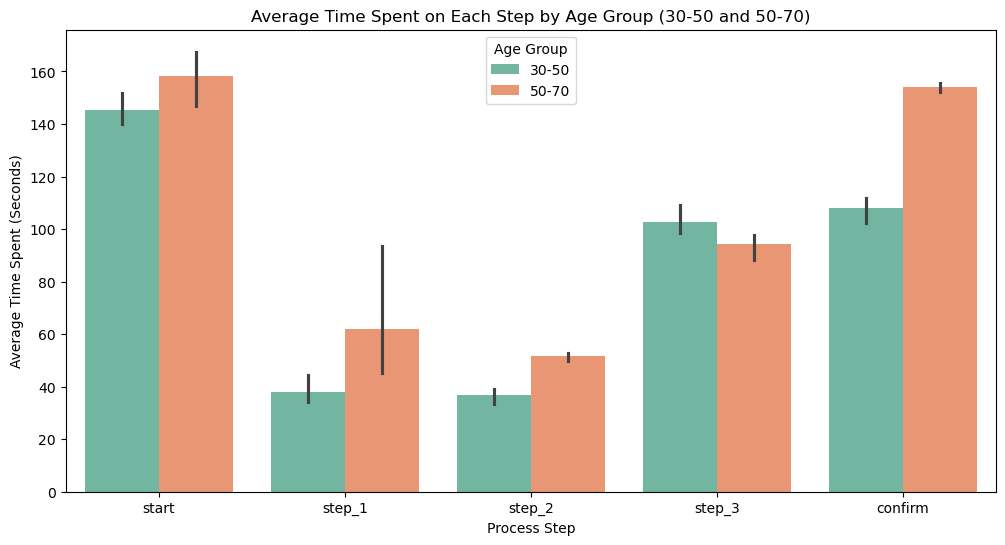

In [57]:
# Bar plot to visualize average time spent by age group and process step
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 and 50-70)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

In [59]:
# Exporting data to CSV for Tableau
df_sorted[['client_id', 'visitor_id', 'gendr', 'age_group', 'process_step', 'time_diff']].to_csv('time_spent_per_step.csv', index=False)

### Time Spent per Step comparing Tested&Controlled Groups and by Age

In [62]:
# Filter only for Test group
df_test = df_sorted[df_sorted['Variation'] == 'Test']

# Group by age group and process step to calculate average time spent
avg_time_by_test_group = df_test.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_test_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/2616895982.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_test_group = df_test.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()


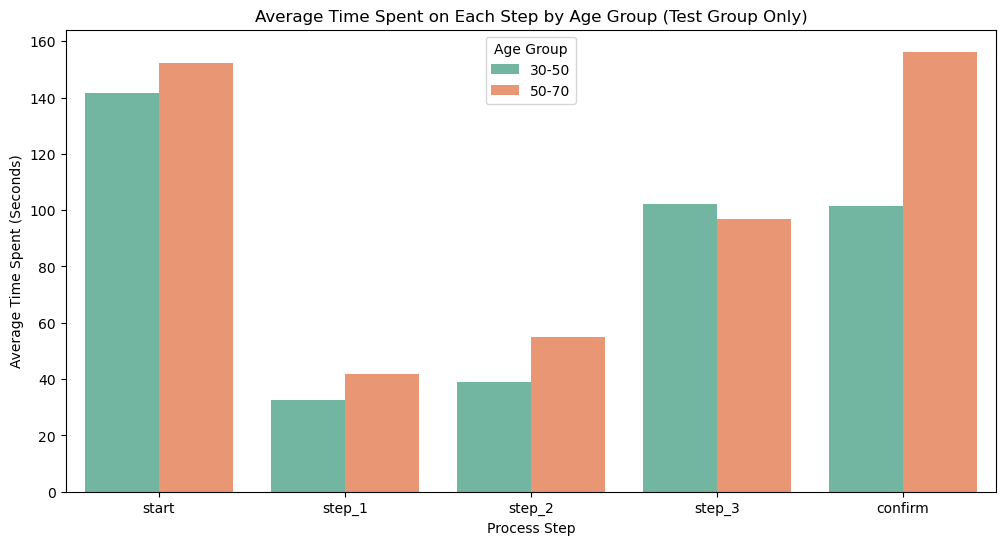

In [64]:
# Bar plot to visualize average time spent by age group and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_test_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

In [66]:
# Filter only for Control group
df_control = df_sorted[df_sorted['Variation'] == 'Control']

# Group by age group and process step to calculate average time spent
avg_time_by_control_group = df_control.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_control_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/879839180.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_control_group = df_control.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()


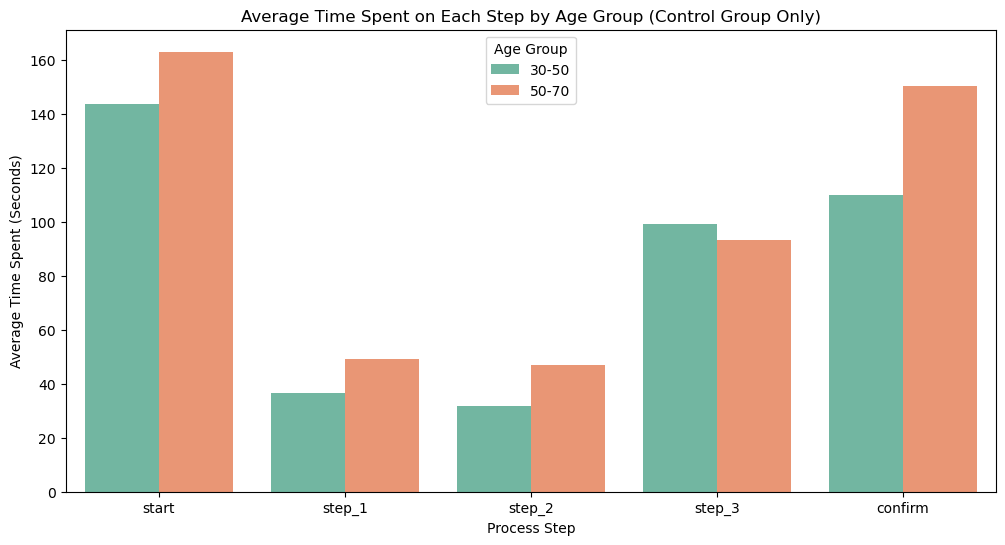

In [68]:
# Bar plot to visualize average time spent by age group and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_control_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

### Time Spent on Each Steps by Gender


In [71]:
# Group by gender and process step to calculate average time spent for Test group
avg_time_by_gender_test = df_test.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_test.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/748248707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_gender_test = df_test.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()


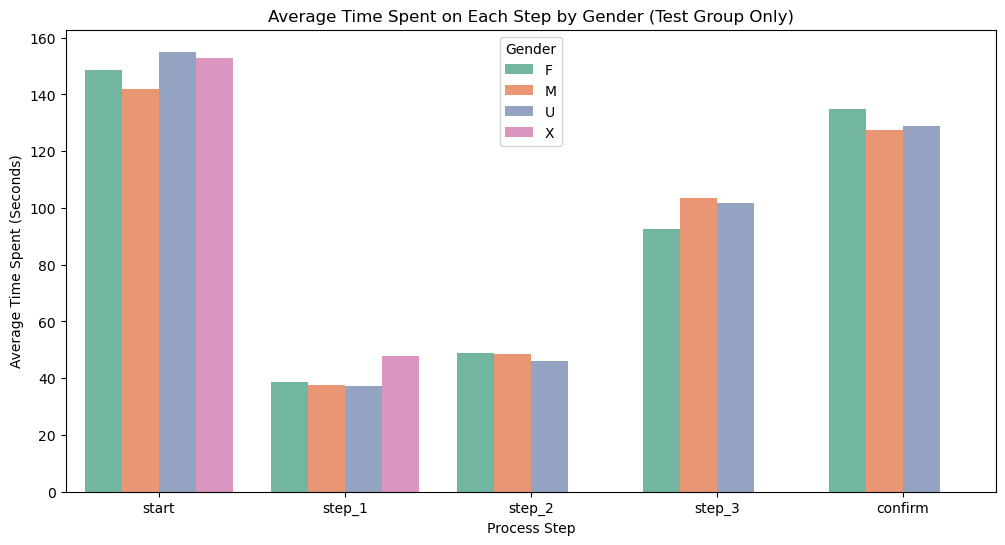

In [73]:
# Bar plot to visualize average time spent by gender and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_test, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

In [75]:
# Group by gender and process step to calculate average time spent for Control group
avg_time_by_gender_control = df_control.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_control.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1416746338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_gender_control = df_control.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()


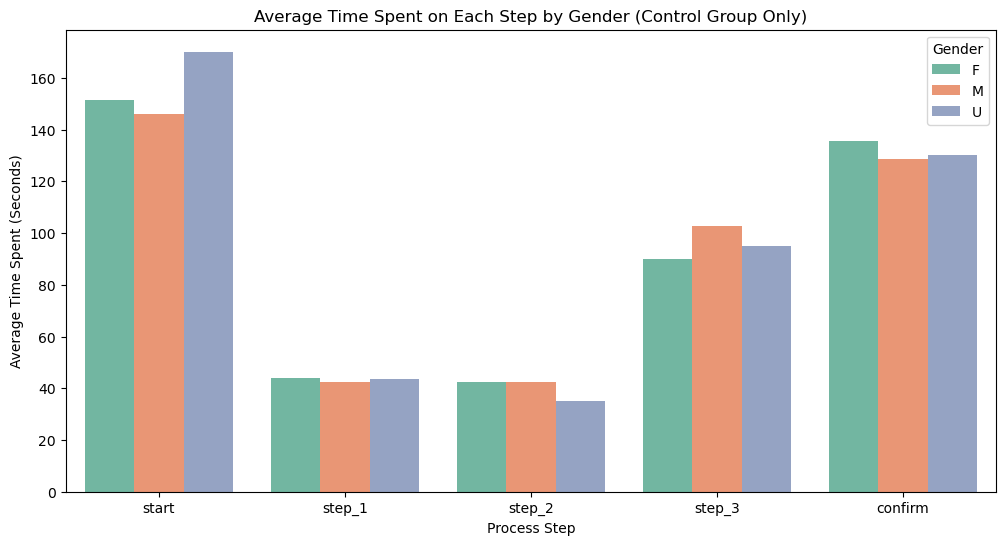

In [77]:
# Bar plot to visualize average time spent by gender and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_control, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

---

# Customer Error Analysis

### Error Rate Test vs Control Groups

In [220]:
# Rename process steps as numerical values for easier comparison
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted['step_numeric'] = df_sorted['process_step'].map(step_mapping).astype(int)

# Identify errors (reversions to a lower step)
df_sorted['step_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['step_numeric'].diff()
df_sorted['error'] = df_sorted['step_diff'] < 0  # Step difference is negative (reversion)

# Group by Variation (Control/Test) to calculate the mean error rate
avg_error_rate_by_group = df_sorted.groupby('Variation')['error'].mean().reset_index()
display(avg_error_rate_by_group)

,Variation,error
0,Control,0.084778
1,Test,0.115218
2,undefined,0.104124


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3510981486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='error', data=avg_error_rate_by_group, palette='Set1')


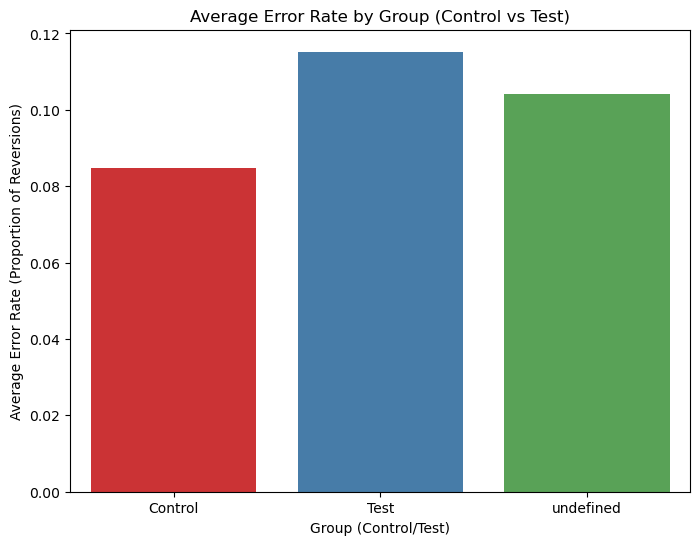

In [132]:
# Plotting the average error rates for Control vs Test groups
plt.figure(figsize=(8, 6))
sns.barplot(x='Variation', y='error', data=avg_error_rate_by_group, palette='Set1')
plt.title('Average Error Rate by Group (Control vs Test)')
plt.xlabel('Group (Control/Test)')
plt.ylabel('Average Error Rate (Proportion of Reversions)')
plt.show()

### Error Rate on each step

In [102]:
# Group by process step and calculate the error rate
error_rate_by_step = df_sorted.groupby(['process_step'])['error'].mean().reset_index()
display(error_rate_by_step)

# Calculate the overall average error rate
overall_avg_error_rate = df_sorted['error'].mean()
display(overall_avg_error_rate)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3977019240.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_step = df_sorted.groupby(['process_step'])['error'].mean().reset_index()


,process_step,error
0,start,0.377815
1,step_1,0.083952
2,step_2,0.080570
3,step_3,0.003495
4,confirm,0.000000


0.1024295461621273

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1797360308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='error', data=error_rate_by_step, palette='Blues_d')


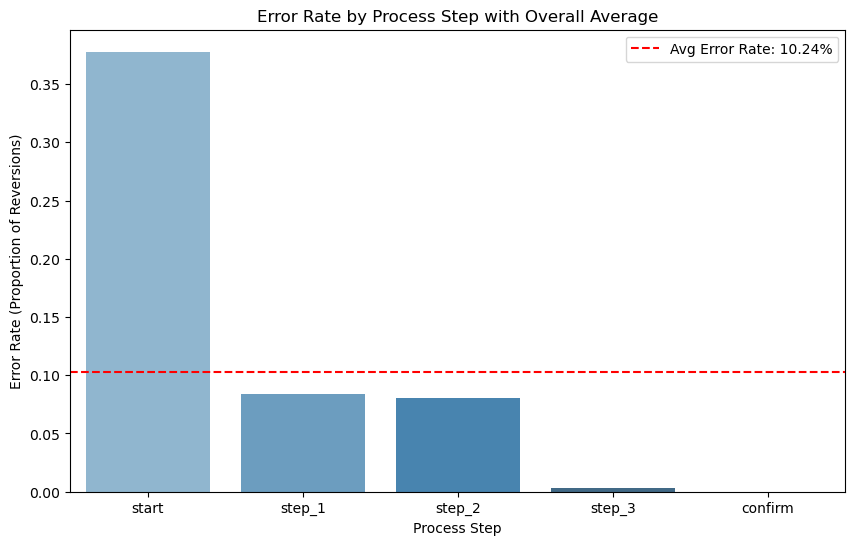

In [189]:
# Plotting the error rate by process step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step, palette='Blues_d')
plt.axhline(overall_avg_error_rate, color='red', linestyle='--', label=f'Avg Error Rate: {overall_avg_error_rate:.2%}')
plt.title('Error Rate by Process Step with Overall Average')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

In [191]:
# Ensure step_numeric is correctly mapped
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted['step_numeric'] = df_sorted['process_step'].map(step_mapping).astype(int)

# Identify errors (reversions to a lower step)
df_sorted['step_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['step_numeric'].diff()
df_sorted['error'] = df_sorted['step_diff'] < 0  # Step difference is negative (reversion)

In [214]:
df_sorted.to_csv('df_sorted.csv', index=False)

In [193]:
# Separate data into Control and Test groups
df_control = df_sorted[df_sorted['Variation'] == 'Control']
display(df_control)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,process_step,date_time,year,date,time,age_group,time_diff,step_numeric,step_diff,error
302414,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:52:17,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:52:17,30-50,49.0,1,NaN,False
302413,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:53:20,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:53:20,30-50,63.0,1,0.0,False
302412,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_2,2017-04-08 18:53:29,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:53:29,30-50,9.0,2,1.0,False
302411,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_3,2017-04-08 18:58:04,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:58:04,30-50,275.0,3,1.0,False
302410,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:59:55,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:59:55,30-50,111.0,1,-2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142960,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_2,2017-03-29 15:30:11,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:30:11,50-70,16.0,2,1.0,False
142959,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_3,2017-03-29 15:30:25,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:30:25,50-70,14.0,3,1.0,False
142956,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_3,2017-03-29 15:37:28,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:37:28,50-70,423.0,3,0.0,False
142957,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,confirm,2017-03-29 15:37:28,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:37:28,50-70,0.0,4,1.0,False


In [222]:
df_control.to_csv('df_control.csv', index=False)

In [195]:
df_test = df_sorted[df_sorted['Variation'] == 'Test']
display(df_test)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,process_step,date_time,year,date,time,age_group,time_diff,step_numeric,step_diff,error
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0,1,NaN,False
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_2,2017-04-12 15:41:53,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:53,50-70,18.0,2,1.0,False
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_3,2017-04-12 15:45:02,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:45:02,50-70,189.0,3,1.0,False
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,confirm,2017-04-12 15:47:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:47:45,50-70,163.0,4,1.0,False
83828,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test,...,start,2017-04-18 02:37:02,1970-01-01 00:00:00.000002017,2017-04-18,2024-09-12 02:37:02,50-70,32.0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0,2,1.0,False
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0,3,1.0,False
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0,4,1.0,False
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0,1,NaN,False


In [224]:
df_test.to_csv('df_test.csv', index=False)

In [197]:
# Calculate average error rates by process step for both groups
error_rate_by_step_control = df_sorted[df_sorted['Variation'] == 'Control'].groupby('process_step')['error'].mean().reset_index()
display(error_rate_by_step_control)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3802422603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_step_control = df_sorted[df_sorted['Variation'] == 'Control'].groupby('process_step')['error'].mean().reset_index()


,process_step,error
0,start,0.283903
1,step_1,0.078402
2,step_2,0.088439
3,step_3,0.005488
4,confirm,0.000000


In [199]:
error_rate_by_step_test = df_sorted[df_sorted['Variation'] == 'Test'].groupby('process_step')['error'].mean().reset_index()
display(error_rate_by_step_test)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/351079514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_step_test = df_sorted[df_sorted['Variation'] == 'Test'].groupby('process_step')['error'].mean().reset_index()


,process_step,error
0,start,0.442030
1,step_1,0.087564
2,step_2,0.072375
3,step_3,0.001174
4,confirm,0.000000


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1828481595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='error', data=error_rate_by_step_control, palette='Blues')


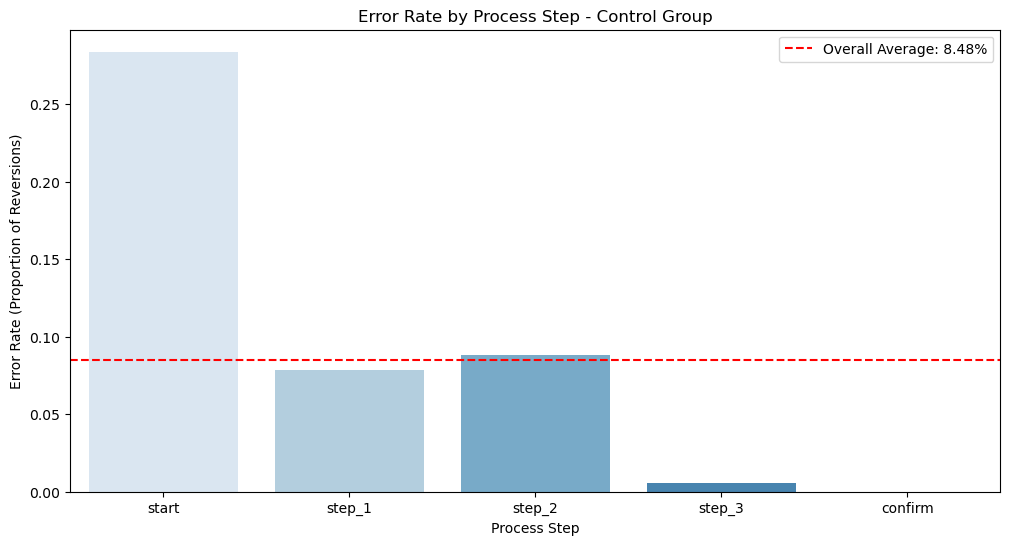

In [201]:
# Plot for Control Group
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step_control, palette='Blues')
plt.axhline(overall_avg_control, color='red', linestyle='--', label=f'Overall Average: {overall_avg_control:.2%}')
plt.title('Error Rate by Process Step - Control Group')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/450947785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='error', data=error_rate_by_step_test, palette='Greens')


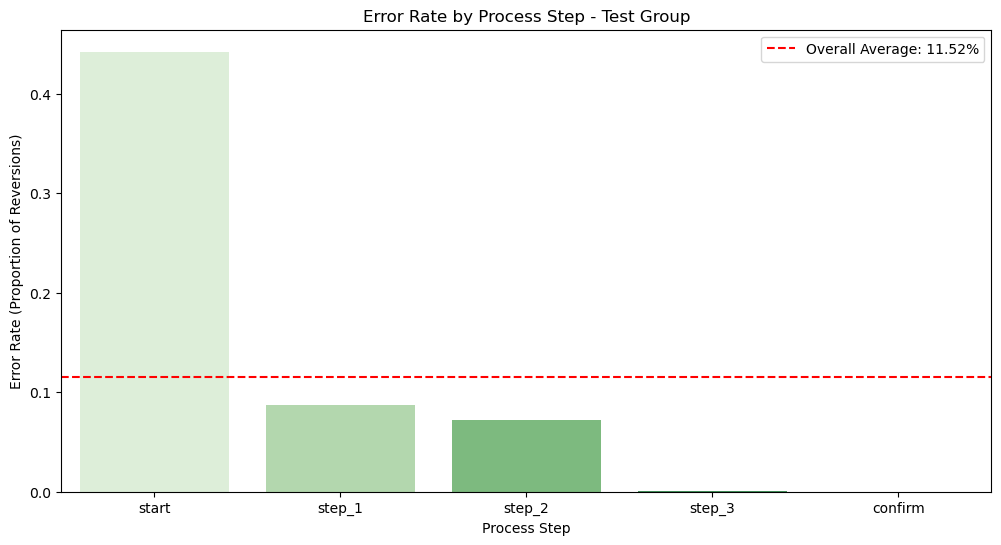

In [203]:
# Plot for Test Group
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step_test, palette='Greens')
plt.axhline(overall_avg_test, color='red', linestyle='--', label=f'Overall Average: {overall_avg_test:.2%}')
plt.title('Error Rate by Process Step - Test Group')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

In [205]:
# Ensure the age groups are correctly defined as 30-50 and 50-70
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Assign age groups
df_sorted['age_group'] = pd.cut(df_sorted['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average error rates by age group and gender
error_rate_by_age_gender = df_sorted.groupby(['age_group', 'gendr'])['error'].mean().reset_index()

# Rename columns for clarity
error_rate_by_age_gender.rename(columns={'error': 'avg_error_rate'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1909329162.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_age_gender = df_sorted.groupby(['age_group', 'gendr'])['error'].mean().reset_index()


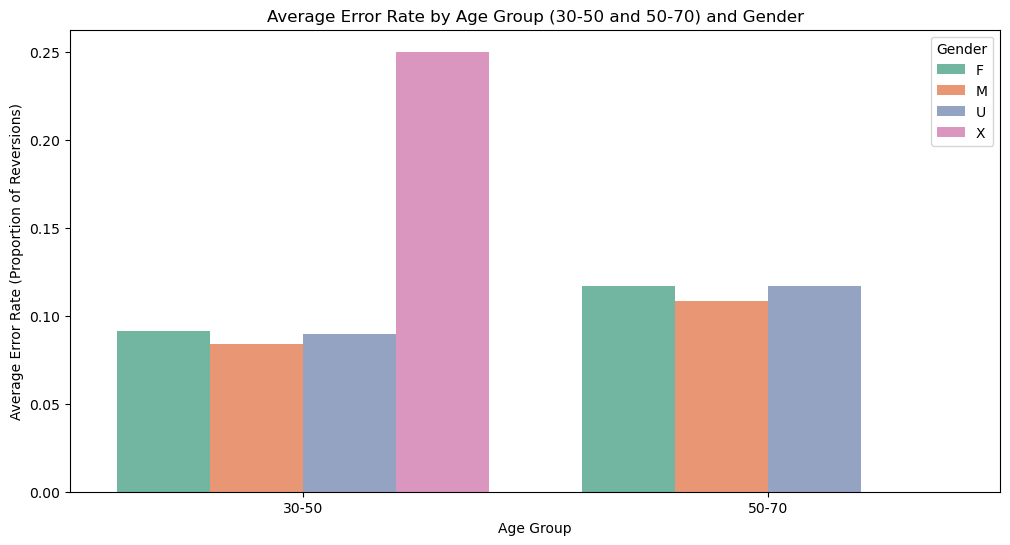

In [207]:
# Plot the error rates by age group and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='avg_error_rate', hue='gendr', data=error_rate_by_age_gender, palette='Set2')
plt.title('Average Error Rate by Age Group (30-50 and 50-70) and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Error Rate (Proportion of Reversions)')
plt.legend(title='Gender')
plt.show()

### Error rates by num_accts, and variation

In [209]:
# Calculate error rates by num_accts, and variation (Test/Control)
error_rate_by_accts = df_sorted.groupby(['age_group', 'num_accts', 'Variation'])['error'].mean().reset_index()
display(error_rate_by_accts)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3324091069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_accts = df_sorted.groupby(['age_group', 'num_accts', 'Variation'])['error'].mean().reset_index()


,age_group,num_accts,Variation,error
0,30-50,1.0,Control,NaN
1,30-50,1.0,Test,0.000000
2,30-50,1.0,undefined,NaN
3,30-50,2.0,Control,0.076686
4,30-50,2.0,Test,0.097636
5,30-50,2.0,undefined,0.092206
6,30-50,3.0,Control,0.080373
7,30-50,3.0,Test,0.087587
8,30-50,3.0,undefined,0.085589
9,30-50,4.0,Control,0.078707


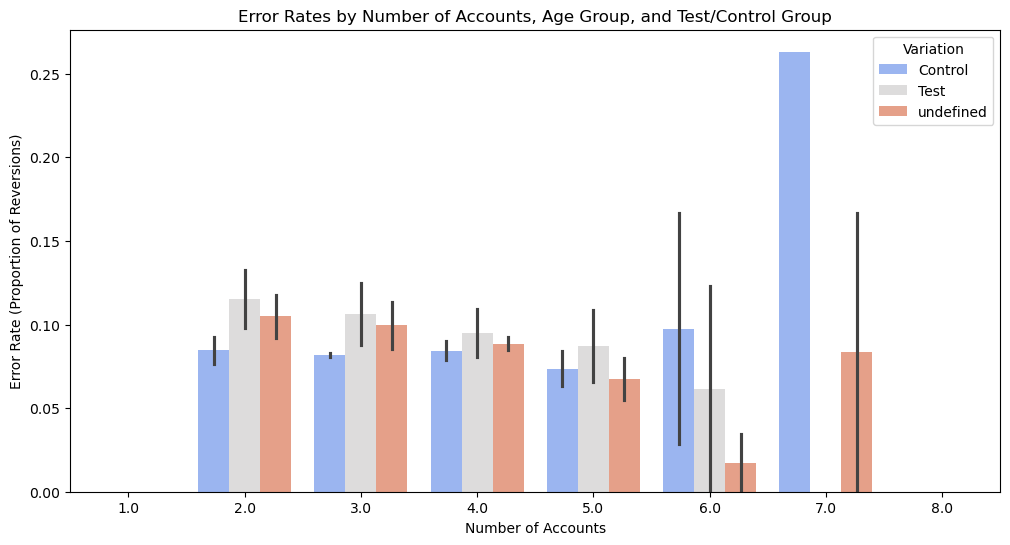

In [211]:
# Visualize the error rates by number of accounts, age group, and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='num_accts', y='error', hue='Variation', data=error_rate_by_accts, palette='coolwarm')
plt.title('Error Rates by Number of Accounts, Age Group, and Test/Control Group')
plt.xlabel('Number of Accounts')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend(title='Variation')
plt.show()

---

# Statistical tests

### Statistical Test (Chi-Square for Gender and Age Group Association)
To check whether gender distribution is independent of age group, a chi-square test has been performed.

In [254]:
# Import necessary library for Chi-Square test
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(gender_age_group_distribution)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: Gender distribution is associated with age group.")
else:
    print("Fail to reject the null hypothesis: Gender distribution is independent of age group.")

Chi-Square Statistic: 29397.090117428997, p-value: 0.0
Reject the null hypothesis: Gender distribution is associated with age group.


### Statistical Test: Two Proportion Z-Test for Completion Rates
To confirm whether the difference in completion rates between the Test and Control groups for the 30-50 age group is statistically significant. You can repeat the same process for the 50-70 age group.

In [263]:
from statsmodels.stats.proportion import proportions_ztest

# Test for 30-50 age group
test_30_50_completed = df_sorted[(df_sorted['Variation'] == 'Test') & (df_sorted['age_group'] == '30-50') & (df_sorted['process_step'] == 'confirm')].shape[0]
control_30_50_completed = df_sorted[(df_sorted['Variation'] == 'Control') & (df_sorted['age_group'] == '30-50') & (df_sorted['process_step'] == 'confirm')].shape[0]

test_30_50_total = df_sorted[(df_sorted['Variation'] == 'Test') & (df_sorted['age_group'] == '30-50')].shape[0]
control_30_50_total = df_sorted[(df_sorted['Variation'] == 'Control') & (df_sorted['age_group'] == '30-50')].shape[0]

# Z-test for 30-50 group
count_30_50 = [test_30_50_completed, control_30_50_completed]
nobs_30_50 = [test_30_50_total, control_30_50_total]
z_stat_30_50, p_value_30_50 = proportions_ztest(count_30_50, nobs_30_50)

print(f"30-50 Age Group: Z-statistic: {z_stat_30_50}, P-value: {p_value_30_50}")

30-50 Age Group: Z-statistic: 5.995053898049821, P-value: 2.0341796392584704e-09


Since the p-value is much smaller than the common threshold of 0.05, we reject the null hypothesis. This means that there is a statistically significant difference in completion rates between the Test and Control groups for the 30-50 age group.

In [275]:
from statsmodels.stats.proportion import proportions_ztest

# Test for 50-70 age group
test_50_70_completed = df_sorted[(df_sorted['Variation'] == 'Test') & (df_sorted['age_group'] == '50-70') & (df_sorted['process_step'] == 'confirm')].shape[0]
control_50_70_completed = df_sorted[(df_sorted['Variation'] == 'Control') & (df_sorted['age_group'] == '50-70') & (df_sorted['process_step'] == 'confirm')].shape[0]

test_50_70_total = df_sorted[(df_sorted['Variation'] == 'Test') & (df_sorted['age_group'] == '50-70')].shape[0]
control_50_70_total = df_sorted[(df_sorted['Variation'] == 'Control') & (df_sorted['age_group'] == '50-70')].shape[0]

# Z-test for 50-70 group
count_50_70 = [test_50_70_completed, control_50_70_completed]
nobs_50_70 = [test_50_70_total, control_50_70_total]
z_stat_50_70, p_value_50_70 = proportions_ztest(count_50_70, nobs_50_70)

print(f"50-70 Age Group: Z-statistic: {z_stat_50_70}, P-value: {p_value_50_70}")

50-70 Age Group: Z-statistic: -1.0176377704132709, P-value: 0.30885013070369904


####  Result comparison between 30-50 and 50-70
- For the 30-50 age group, we observed a significant difference in completion rates between the Test and Control groups (Z-statistic of 5.995, p-value of 2.03e-09), indicating that the new design (Test group) performed much better than the old design (Control group).
- However, for the 50-70 age group, the Test group did not show a statistically significant improvement over the Control group (Z-statistic of -1.018, p-value of 0.3089), suggesting that the new design had little to no effect on the completion rates for this older age group.

#### Conclusion:
- The new design was highly effective for the 30-50 age group, leading to a significant increase in completion rates.
- For the 50-70 age group, the new design did not show any meaningful improvement or degradation in performance.

### Statistical Test: Independent T-Test
To determine whether there is a statistically significant difference in the time spent between the 30-50 and 50-70 age groups on any given step

In [289]:
import scipy.stats as stats

# Separate data by age groups
time_30_50 = df_sorted[df_sorted['age_group'] == '30-50']
time_50_70 = df_sorted[df_sorted['age_group'] == '50-70']

# Perform T-Test for each step
for step in step_order:
    step_30_50 = time_30_50[time_30_50['process_step'] == step]['time_diff']
    step_50_70 = time_50_70[time_50_70['process_step'] == step]['time_diff']
    
    # T-Test
    t_stat, p_value = stats.ttest_ind(step_30_50, step_50_70, nan_policy='omit')
    
    print(f'Step: {step}, T-statistic: {t_stat}, P-value: {p_value}')

Step: start, T-statistic: -3.6446416163112803, P-value: 0.00026807842894812603
Step: step_1, T-statistic: -15.099660103221758, P-value: 1.9548398694858817e-51
Step: step_2, T-statistic: -20.352364069956238, P-value: 9.077027767656011e-92
Step: step_3, T-statistic: 8.134331682033132, P-value: 4.2348183320998004e-16
Step: confirm, T-statistic: -22.406503517216997, P-value: 1.552569286172074e-110


#### Conclusion:
- Start: The p-value is less than 0.05, meaning we reject the null hypothesis. There is a statistically significant difference in the time spent on the “start” step between the 30-50 and 50-70 age groups. The negative T-statistic indicates that the younger group (30-50) spends less time on this step compared to the older group (50-70).
- Step 2: The extremely low p-value (close to zero) means we reject the null hypothesis. There is a significant difference in the time spent on “step_1”, with the younger group (30-50) completing this step much faster than the older group (50-70), as indicated by the negative T-statistic.
- Step 3: Once again, the p-value is significantly lower than 0.05, confirming that the younger group spends much less time on “step_2” than the older group. This step shows a large time disparity between age groups.
- Step 4: The positive T-statistic suggests that the older group (50-70) completes “step_3” faster than the younger group (30-50), which is an interesting finding. The p-value is extremely low, confirming the significance of this result.
- Confirm: The p-value is extremely low, indicating a significant difference in time spent on the “confirm” step. The younger group (30-50) completes this step much faster than the older group, as indicated by the negative T-statistic.

### Statistical Test: T Test
To statistically compare the time spent between Test and Control groups or between different genders or age groups

In [297]:
from scipy.stats import ttest_ind

# Define the process steps
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Run t-tests for each step
for step in steps:
    test_group = df_test[df_test['process_step'] == step]['time_diff']
    control_group = df_control[df_control['process_step'] == step]['time_diff']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(test_group, control_group)
    
    print(f"Step: {step}, T-statistic: {t_stat}, P-value: {p_value}")

Step: start, T-statistic: -1.304217338133619, P-value: 0.19216911640739537
Step: step_1, T-statistic: -6.393383736625256, P-value: 1.6363395864331277e-10
Step: step_2, T-statistic: 9.680674847799034, P-value: 3.836274922994447e-22
Step: step_3, T-statistic: 2.5124767022015306, P-value: 0.01199293183555332
Step: confirm, T-statistic: -0.4317074705468937, P-value: 0.665957138180115


#### Result:
##### Step: Start
The p-value is greater than 0.05, meaning there is no statistically significant difference in the time spent at the ‘start’ step between the Test and Control groups.
##### Step: Step 1
The p-value is very small (less than 0.05), indicating a significant difference in the time spent at ‘step 1’ between the Test and Control groups. The negative T-statistic suggests that the Control group spent more time at this step compared to the Test group.
##### Step: Step 2
This result is highly significant, with a very small p-value, indicating a significant difference in time spent on ‘step 2’. The positive T-statistic means the Test group spent more time at this step than the Control group.
##### Step: Step 3
With a p-value less than 0.05, there is a significant difference in time spent on ‘step 3’. The positive T-statistic indicates that the Test group spent more time here compared to the Control group.
##### Step: Confirm
The p-value is much greater than 0.05, meaning there is no significant difference in the time spent on the ‘confirm’ step between the two groups.

### Statistical Tests (Z-tests) for Error Rates


In [316]:
from scipy.stats import ttest_ind

# Error rates for Test vs Control
control_errors = df_control['error']
test_errors = df_test['error']

# Conducting the t-test
t_stat, p_val = ttest_ind(control_errors, test_errors, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -22.348419624285263, P-value: 1.7345583558131707e-110


#### Result:
T-statistic being negative suggests that the Test group has a higher error rate than the Control group, as observed in the earlier analysis.

#### Conclusion:
The Test group experiences significantly more errors compared to the Control group. The new design may not be as intuitive or may present challenges that increase user mistakes, particularly in the initial steps of the process.